In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]


(-150, 150)

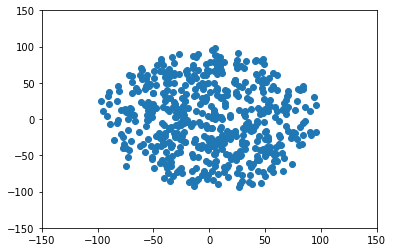

In [21]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [2]:
m = np.ones(531)*5e11
m = m/531
print len(m)

531


# “Drift-Kick-Drift” version

In [23]:
vel = np.ndarray([len(m),3])

vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

pos = np.ndarray([len(m),3])

pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)
#print a

In [24]:
import LF
dt = 0.0001
nit = 10000
    
posf,velf,acf = LF.DKD(eps,dt,nit,m,pos,vel,acel)

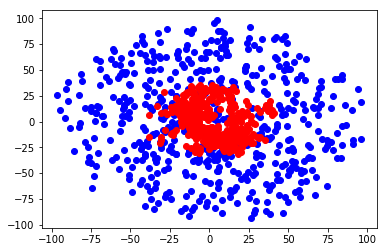

In [25]:
plt.plot(x,y,'o',color='b')
plt.plot(posf[:,0],posf[:,1],'o',color='r')

In [26]:
import energia_potencial as ep

Ui = ep.epot(eps,x,y,z,m)
Ki = 0.5*m*(vx**2 + vy**2 + vz**2)

Ei = Ki - Ui

In [3]:
import energia_potencial as ep
nit = 10000
eps=0.5
Ef = np.zeros(nit/10)
# path = '/home/users/valeria/metodos_numericos/_data/DKD/'
path = '/home/ornela/metodos_numericos/_data/DKD'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    Uf = np.sum(Uf, axis=0)
    E = Kf - Uf
    Ef[k] = np.sum(E)
    k += 1
    

In [6]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[i])/abs(Ef[i+1])

print dE
dt = 0.0001
time = dt*np.arange(5,nit-5,10)

[  4.22979892e-06   1.19823646e-05   1.98897488e-05   2.80304352e-05
   3.64075699e-05   4.49078514e-05   5.31796862e-05   6.04857937e-05
   6.55249508e-05   6.64326018e-05   6.13390118e-05   4.97332788e-05
   3.39622931e-05   1.88685120e-05   9.04646597e-06   6.37025362e-06
   1.00498510e-05   1.82269910e-05   2.92215340e-05   4.19838664e-05
   5.60328282e-05   7.12872913e-05   8.78849101e-05   1.05989558e-04
   1.25511719e-04   1.45530108e-04   1.63286632e-04   1.73021196e-04
   1.67144221e-04   1.43731987e-04   1.14864802e-04   9.72990054e-05
   9.29155078e-05   8.70612470e-05   6.25673375e-05   1.67860317e-05
  -3.31671143e-05  -6.87339386e-05  -8.51290906e-05  -8.63185732e-05
  -7.76104813e-05  -6.34656436e-05  -4.70983741e-05  -3.05048289e-05
  -1.47036999e-05  -8.86007855e-08   1.32947696e-05   2.55757336e-05
   3.69491686e-05   4.76294523e-05   5.78233362e-05   6.77193877e-05
   7.74806963e-05   8.72210124e-05   9.69756417e-05   1.06637396e-04
   1.15837620e-04   1.23791549e-04

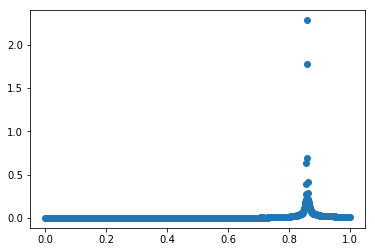

In [7]:
plt.plot(time,dE,'o')

# “Kick-Drift-Kick” version

In [12]:
vel = np.ndarray([len(m),3])

vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

pos = np.ndarray([len(m),3])

pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)
#print a

In [14]:
import LF
dt = 0.01
nit = 100
    
posf,velf,acf = LF.KDK(eps,dt,nit,m,pos,vel,acel)

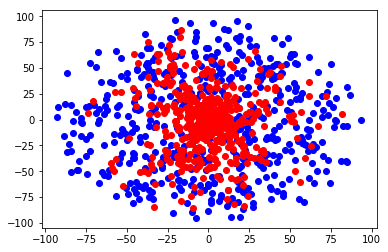

In [15]:
plt.plot(x,y,'o',color='b')
plt.plot(posf[:,0],posf[:,1],'o',color='r')

In [16]:
import energia_potencial as ep

Ui = ep.epot(eps,x,y,z,m)
Ki = 0.5*m*(vx**2 + vy**2 + vz**2)

Ei = Ki - Ui

In [4]:
import energia_potencial as ep
dt = 0.01
nit = 100

Ef = np.zeros(nit/10)
# path = '/home/users/valeria/metodos_numericos/_data/KDK/'
path = '/home/ornela/metodos_numericos/_data/KDK'

k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    E = Kf - Uf
    Ef[k] = np.sum(E)
    k += 1

NameError: name 'eps' is not defined

In [18]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[i])/abs(Ef[i+1])

#print dE

time = dt*np.arange(5,nit-5,10)

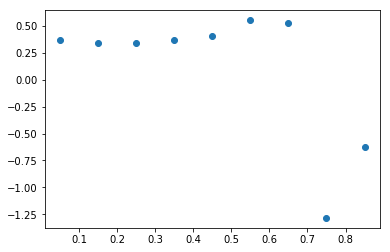

In [19]:
plt.plot(time,dE,'o')